# ASTRO 9 - Final Project - Luminosity Analysis 


Orbital Periods vs. Luminosity

In [1]:
########################################
### This file is created by: Aaron Su###
## University of California - Berkeley##
############# Astronomy 9 ##############
############# Summer 2022 ##############
#    _                     _                 _ _            ___              _           _     
#   | |                   (_)               (_) |          / _ \            | |         (_)    
#   | |    _   _ _ __ ___  _ _ __   ___  ___ _| |_ _   _  / /_\ \_ __   __ _| |_   _ ___ _ ___ 
#   | |   | | | | '_ ` _ \| | '_ \ / _ \/ __| | __| | | | |  _  | '_ \ / _` | | | | / __| / __|
#   | |___| |_| | | | | | | | | | | (_) \__ \ | |_| |_| | | | | | | | | (_| | | |_| \__ \ \__ \
#   \_____/\__,_|_| |_| |_|_|_| |_|\___/|___/_|\__|\__, | \_| |_/_| |_|\__,_|_|\__, |___/_|___/
#                                                __/ |                       __/ |          
#                                               |___/                       |___/           
#
#
# Version 0.0.1

#Libary Import
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy.integrate as scint
import scipy.optimize as sco



#Dataframe
Location = r'dataframe (1).csv'
d = pd.read_csv(Location)
df = pd.DataFrame(d)
df.drop(df.columns[[3,5,6,10, 11, 19,20]], axis=1,inplace=True)
df


,System,Period (days),V,Mass (Msun),log Teff (K),log (L/Lsun),[M/H],B-V,Sec Spectral type,Sec Mass (Msun ),Sec Radius (Rsun),Sec Surface gravity (cgs),Sec Log Teff (K),Sec log (L/Lsun)
0,V3903 Sgr,1.744,7.27,27.27 ± 0.55,4.580 ± 0.021,5.087 ± 0.029,NaN,0.06,O9_V,19.01 ± 0.44,6.125 ± 0.060,4.143 ± 0.013,4.531 ± 0.021,4.658 ± 0.032
1,V467 Vel,2.753,10.90,25.3 ± 0.7,4.559 ± 0.031,5.187 ± 0.126,NaN,0.00,B1_V,8.25 ± 0.17,3.49 ± 0.03,4.268 ± 0.017,4.402 ± 0.046,3.649 ± 0.110
2,CC Cas,3.366,7.08,23.49 ± 0.92,4.538 ± 0.025,5.179 ± 0.053,NaN,0.48,B0.5_V,9.95 ± 0.34,6.84 ± 0.18,3.766 ± 0.022,4.452 ± 0.031,4.474 ± 0.064
3,EM Car,3.414,8.38,22.89 ± 0.32,4.531 ± 0.026,5.02 ± 0.10,NaN,-0.31,O8_V,21.43 ± 0.33,8.34 ± 0.14,3.926 ± 0.016,4.531 ± 0.026,4.92 ± 0.10
4,δ Cir,3.902,5.09,20.00 ± 0.50,4.574 ± 0.010,5.184 ± 0.070,NaN,-0.06,O9.5_V,11.41 ± 0.24,5.326 ± 0.091,4.043 ± 0.014,4.519 ± 0.013,4.339 ± 0.090
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
287,UScoCTIO 5,34.001,16.19,0.3393 ± 0.0020,3.515 ± 0.013,-1.105 ± 0.053,NaN,1.62,M4.5_V,0.3263 ± 0.0020,0.8376 ± 0.0024,4.1053 ± 0.0021,3.513 ± 0.013,-1.146 ± 0.059
288,KOI-126 BC,1.722,-1.00,0.2352 ± 0.0006,3.510 ± 0.005,-2.194 ± 0.020,0.15,-1.00,M,0.2073 ± 0.0006,0.2315 ± 0.0007,5.026 ± 0.003,3.501 ± 0.005,-2.312 ± 0.020
289,CM Dra,1.268,12.90,0.2310 ± 0.0009,3.496 ± 0.010,-2.258 ± 0.038,-0.30,1.60,M4.5_V,0.2141 ± 0.0009,0.2396 ± 0.0015,5.009 ± 0.006,3.494 ± 0.014,-2.313 ± 0.056
290,NGTS J052218.2-250710.4,1.748,16.88,0.1739 ± 0.0013,3.476 ± 0.014,NaN,NaN,1.49,M5_V,0.1742 ± 0.0013,0.2168 ± 0.0048,5.007 ± 0.020,3.477 ± 0.012,NaN


# Log(L/Sun) v.s. Orbital Period (Days)

Log(L/Sun) v.s. Orbital Period (Days)

In [2]:
#Replaces the spaces in the dataframe column headers
df.columns = [c.replace(' ', '_') for c in df.columns]
#Replaces the parthanthesis in the dataframe column headers
df.columns = [c.replace('(', '_') for c in df.columns]
df.columns = [c.replace(')', '_') for c in df.columns]
#Replaces the slash in the dataframe column headers
df.columns = [c.replace('/', '_') for c in df.columns]
#drops nan values for Lumonsity and Period values
df.dropna(subset=['log__L_Lsun_', 'Period__days_'], inplace=True)
df

,System,Period__days_,V,Mass__Msun_,log_Teff__K_,log__L_Lsun_,[M_H],B-V,Sec_Spectral_type,Sec_Mass__Msun__,Sec_Radius__Rsun_,Sec_Surface_gravity__cgs_,Sec_Log_Teff__K_,Sec_log__L_Lsun_
0,V3903 Sgr,1.744,7.27,27.27 ± 0.55,4.580 ± 0.021,5.087 ± 0.029,NaN,0.06,O9_V,19.01 ± 0.44,6.125 ± 0.060,4.143 ± 0.013,4.531 ± 0.021,4.658 ± 0.032
1,V467 Vel,2.753,10.90,25.3 ± 0.7,4.559 ± 0.031,5.187 ± 0.126,NaN,0.00,B1_V,8.25 ± 0.17,3.49 ± 0.03,4.268 ± 0.017,4.402 ± 0.046,3.649 ± 0.110
2,CC Cas,3.366,7.08,23.49 ± 0.92,4.538 ± 0.025,5.179 ± 0.053,NaN,0.48,B0.5_V,9.95 ± 0.34,6.84 ± 0.18,3.766 ± 0.022,4.452 ± 0.031,4.474 ± 0.064
3,EM Car,3.414,8.38,22.89 ± 0.32,4.531 ± 0.026,5.02 ± 0.10,NaN,-0.31,O8_V,21.43 ± 0.33,8.34 ± 0.14,3.926 ± 0.016,4.531 ± 0.026,4.92 ± 0.10
4,δ Cir,3.902,5.09,20.00 ± 0.50,4.574 ± 0.010,5.184 ± 0.070,NaN,-0.06,O9.5_V,11.41 ± 0.24,5.326 ± 0.091,4.043 ± 0.014,4.519 ± 0.013,4.339 ± 0.090
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
286,LSPM J1112+7626,41.033,14.85,0.3946 ± 0.0023,3.486 ± 0.024,-1.92 ± 0.08,NaN,1.49,none,0.2745 ± 0.0012,0.2978 ± 0.0048,4.929 ± 0.014,3.470 ± 0.023,-2.21 ± 0.09
287,UScoCTIO 5,34.001,16.19,0.3393 ± 0.0020,3.515 ± 0.013,-1.105 ± 0.053,NaN,1.62,M4.5_V,0.3263 ± 0.0020,0.8376 ± 0.0024,4.1053 ± 0.0021,3.513 ± 0.013,-1.146 ± 0.059
288,KOI-126 BC,1.722,-1.00,0.2352 ± 0.0006,3.510 ± 0.005,-2.194 ± 0.020,0.15,-1.00,M,0.2073 ± 0.0006,0.2315 ± 0.0007,5.026 ± 0.003,3.501 ± 0.005,-2.312 ± 0.020
289,CM Dra,1.268,12.90,0.2310 ± 0.0009,3.496 ± 0.010,-2.258 ± 0.038,-0.30,1.60,M4.5_V,0.2141 ± 0.0009,0.2396 ± 0.0015,5.009 ± 0.006,3.494 ± 0.014,-2.313 ± 0.056


In [3]:
print(df.dtypes)

System                        object
Period__days_                float64
V                            float64
Mass__Msun_                   object
log_Teff__K_                  object
log__L_Lsun_                  object
[M_H]                        float64
B-V                          float64
Sec_Spectral_type             object
Sec_Mass__Msun__              object
Sec_Radius__Rsun_             object
Sec_Surface_gravity__cgs_     object
Sec_Log_Teff__K_              object
Sec_log__L_Lsun_              object
dtype: object


In [4]:
#Grabs Sigma Values, as well as splitting 'log__L_Lsun_' from being a string to a float
lum = np.array(df['log__L_Lsun_'])
orbital = np.array(df['Period__days_'])

luminosity = []
lum_sigma = []

for i in range(len(lum)):
    luminosity.append(float(lum[i][0:5]))
    lum_sigma.append(float(lum[i][-5:-1]))


#Creates a new column for Luminosity & Uncertainies
df['Luminosity'] = luminosity
df['Lum_Sigma'] = lum_sigma

df

,System,Period__days_,V,Mass__Msun_,log_Teff__K_,log__L_Lsun_,[M_H],B-V,Sec_Spectral_type,Sec_Mass__Msun__,Sec_Radius__Rsun_,Sec_Surface_gravity__cgs_,Sec_Log_Teff__K_,Sec_log__L_Lsun_,Luminosity,Lum_Sigma
0,V3903 Sgr,1.744,7.27,27.27 ± 0.55,4.580 ± 0.021,5.087 ± 0.029,NaN,0.06,O9_V,19.01 ± 0.44,6.125 ± 0.060,4.143 ± 0.013,4.531 ± 0.021,4.658 ± 0.032,5.087,0.02
1,V467 Vel,2.753,10.90,25.3 ± 0.7,4.559 ± 0.031,5.187 ± 0.126,NaN,0.00,B1_V,8.25 ± 0.17,3.49 ± 0.03,4.268 ± 0.017,4.402 ± 0.046,3.649 ± 0.110,5.187,0.12
2,CC Cas,3.366,7.08,23.49 ± 0.92,4.538 ± 0.025,5.179 ± 0.053,NaN,0.48,B0.5_V,9.95 ± 0.34,6.84 ± 0.18,3.766 ± 0.022,4.452 ± 0.031,4.474 ± 0.064,5.179,0.05
3,EM Car,3.414,8.38,22.89 ± 0.32,4.531 ± 0.026,5.02 ± 0.10,NaN,-0.31,O8_V,21.43 ± 0.33,8.34 ± 0.14,3.926 ± 0.016,4.531 ± 0.026,4.92 ± 0.10,5.020,0.10
4,δ Cir,3.902,5.09,20.00 ± 0.50,4.574 ± 0.010,5.184 ± 0.070,NaN,-0.06,O9.5_V,11.41 ± 0.24,5.326 ± 0.091,4.043 ± 0.014,4.519 ± 0.013,4.339 ± 0.090,5.184,0.07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
286,LSPM J1112+7626,41.033,14.85,0.3946 ± 0.0023,3.486 ± 0.024,-1.92 ± 0.08,NaN,1.49,none,0.2745 ± 0.0012,0.2978 ± 0.0048,4.929 ± 0.014,3.470 ± 0.023,-2.21 ± 0.09,-1.920,0.00
287,UScoCTIO 5,34.001,16.19,0.3393 ± 0.0020,3.515 ± 0.013,-1.105 ± 0.053,NaN,1.62,M4.5_V,0.3263 ± 0.0020,0.8376 ± 0.0024,4.1053 ± 0.0021,3.513 ± 0.013,-1.146 ± 0.059,-1.100,0.05
288,KOI-126 BC,1.722,-1.00,0.2352 ± 0.0006,3.510 ± 0.005,-2.194 ± 0.020,0.15,-1.00,M,0.2073 ± 0.0006,0.2315 ± 0.0007,5.026 ± 0.003,3.501 ± 0.005,-2.312 ± 0.020,-2.190,0.02
289,CM Dra,1.268,12.90,0.2310 ± 0.0009,3.496 ± 0.010,-2.258 ± 0.038,-0.30,1.60,M4.5_V,0.2141 ± 0.0009,0.2396 ± 0.0015,5.009 ± 0.006,3.494 ± 0.014,-2.313 ± 0.056,-2.250,0.03


In [5]:
#Sort Values in terms of Orbital Period
df = df.sort_values(by = 'Luminosity',kind='quicksort')
df = df.reset_index(drop=True)
df

,System,Period__days_,V,Mass__Msun_,log_Teff__K_,log__L_Lsun_,[M_H],B-V,Sec_Spectral_type,Sec_Mass__Msun__,Sec_Radius__Rsun_,Sec_Surface_gravity__cgs_,Sec_Log_Teff__K_,Sec_log__L_Lsun_,Luminosity,Lum_Sigma
0,CM Dra,1.268,12.90,0.2310 ± 0.0009,3.496 ± 0.010,-2.258 ± 0.038,-0.30,1.60,M4.5_V,0.2141 ± 0.0009,0.2396 ± 0.0015,5.009 ± 0.006,3.494 ± 0.014,-2.313 ± 0.056,-2.250,0.03
1,KOI-126 BC,1.722,-1.00,0.2352 ± 0.0006,3.510 ± 0.005,-2.194 ± 0.020,0.15,-1.00,M,0.2073 ± 0.0006,0.2315 ± 0.0007,5.026 ± 0.003,3.501 ± 0.005,-2.312 ± 0.020,-2.190,0.02
2,LSPM J1112+7626,41.033,14.85,0.3946 ± 0.0023,3.486 ± 0.024,-1.92 ± 0.08,NaN,1.49,none,0.2745 ± 0.0012,0.2978 ± 0.0048,4.929 ± 0.014,3.470 ± 0.023,-2.21 ± 0.09,-1.920,0.00
3,PTFEB 132.707+19.810,6.016,17.89,0.3953 ± 0.0020,3.513 ± 0.012,-1.863 ± 0.032,0.14,1.66,M4.3_V,0.2098 ± 0.0014,0.272 ± 0.012,4.891 ± 0.039,3.494 ± 0.015,-2.30 ± 0.13,-1.860,0.03
4,EPIC 203710387,2.809,14.30,0.1158 ± 0.0031,3.483 ± 0.011,-1.842 ± 0.047,NaN,1.80,M5V,0.1056 ± 0.0027,0.4236 ± 0.0056,4.207 ± 0.010,3.483 ± 0.011,-1.861 ± 0.047,-1.840,0.04
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
241,EM Car,3.414,8.38,22.89 ± 0.32,4.531 ± 0.026,5.02 ± 0.10,NaN,-0.31,O8_V,21.43 ± 0.33,8.34 ± 0.14,3.926 ± 0.016,4.531 ± 0.026,4.92 ± 0.10,5.020,0.10
242,V3903 Sgr,1.744,7.27,27.27 ± 0.55,4.580 ± 0.021,5.087 ± 0.029,NaN,0.06,O9_V,19.01 ± 0.44,6.125 ± 0.060,4.143 ± 0.013,4.531 ± 0.021,4.658 ± 0.032,5.087,0.02
243,CC Cas,3.366,7.08,23.49 ± 0.92,4.538 ± 0.025,5.179 ± 0.053,NaN,0.48,B0.5_V,9.95 ± 0.34,6.84 ± 0.18,3.766 ± 0.022,4.452 ± 0.031,4.474 ± 0.064,5.179,0.05
244,δ Cir,3.902,5.09,20.00 ± 0.50,4.574 ± 0.010,5.184 ± 0.070,NaN,-0.06,O9.5_V,11.41 ± 0.24,5.326 ± 0.091,4.043 ± 0.014,4.519 ± 0.013,4.339 ± 0.090,5.184,0.07


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


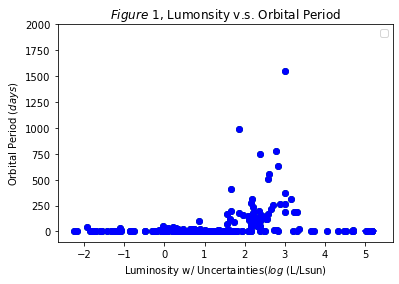

In [6]:
#Plotting with errorbars
plt.errorbar(df.Luminosity, df.Period__days_, xerr=df.Lum_Sigma, yerr=0, fmt='bo')
plt.scatter(df.Luminosity, df.Period__days_, c='green')
plt.rcParams["figure.figsize"] = [30,20]
plt.title('$Figure$ $1$, Lumonsity v.s. Orbital Period')
plt.ylabel('Orbital Period ($days$)')
plt.xlabel('Luminosity w/ Uncertainties($log$ (L/Lsun)')
plt.ylim(-100,2000)
plt.legend(loc='upper right')
plt.show()

Quadratic Chi Squared and Reduced Chi Squared
chi^2 =   inf
chi^2/d.f.=  inf
Sine Wave Chi Squared and Reduced Chi Squared
chi^2 =   inf
chi^2/d.f.=  inf


/Users/aaronsu/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/minpack.py:756: RuntimeWarning: divide by zero encountered in true_divide
  transform = 1.0 / sigma
/Users/aaronsu/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/var/folders/yw/mbkk14vn3nnczstvd2hkrm4r0000gn/T/ipykernel_16716/1444520871.py:18: RuntimeWarning: invalid value encountered in double_scalars
  corr[i,j] = cov[i,j]/np.sqrt(cov[i,i]*cov[j,j])
/Users/aaronsu/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/minpack.py:756: RuntimeWarning: divide by zero encountered in true_divide
  transform = 1.0 / sigma
/Users/aaronsu/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/var/fo

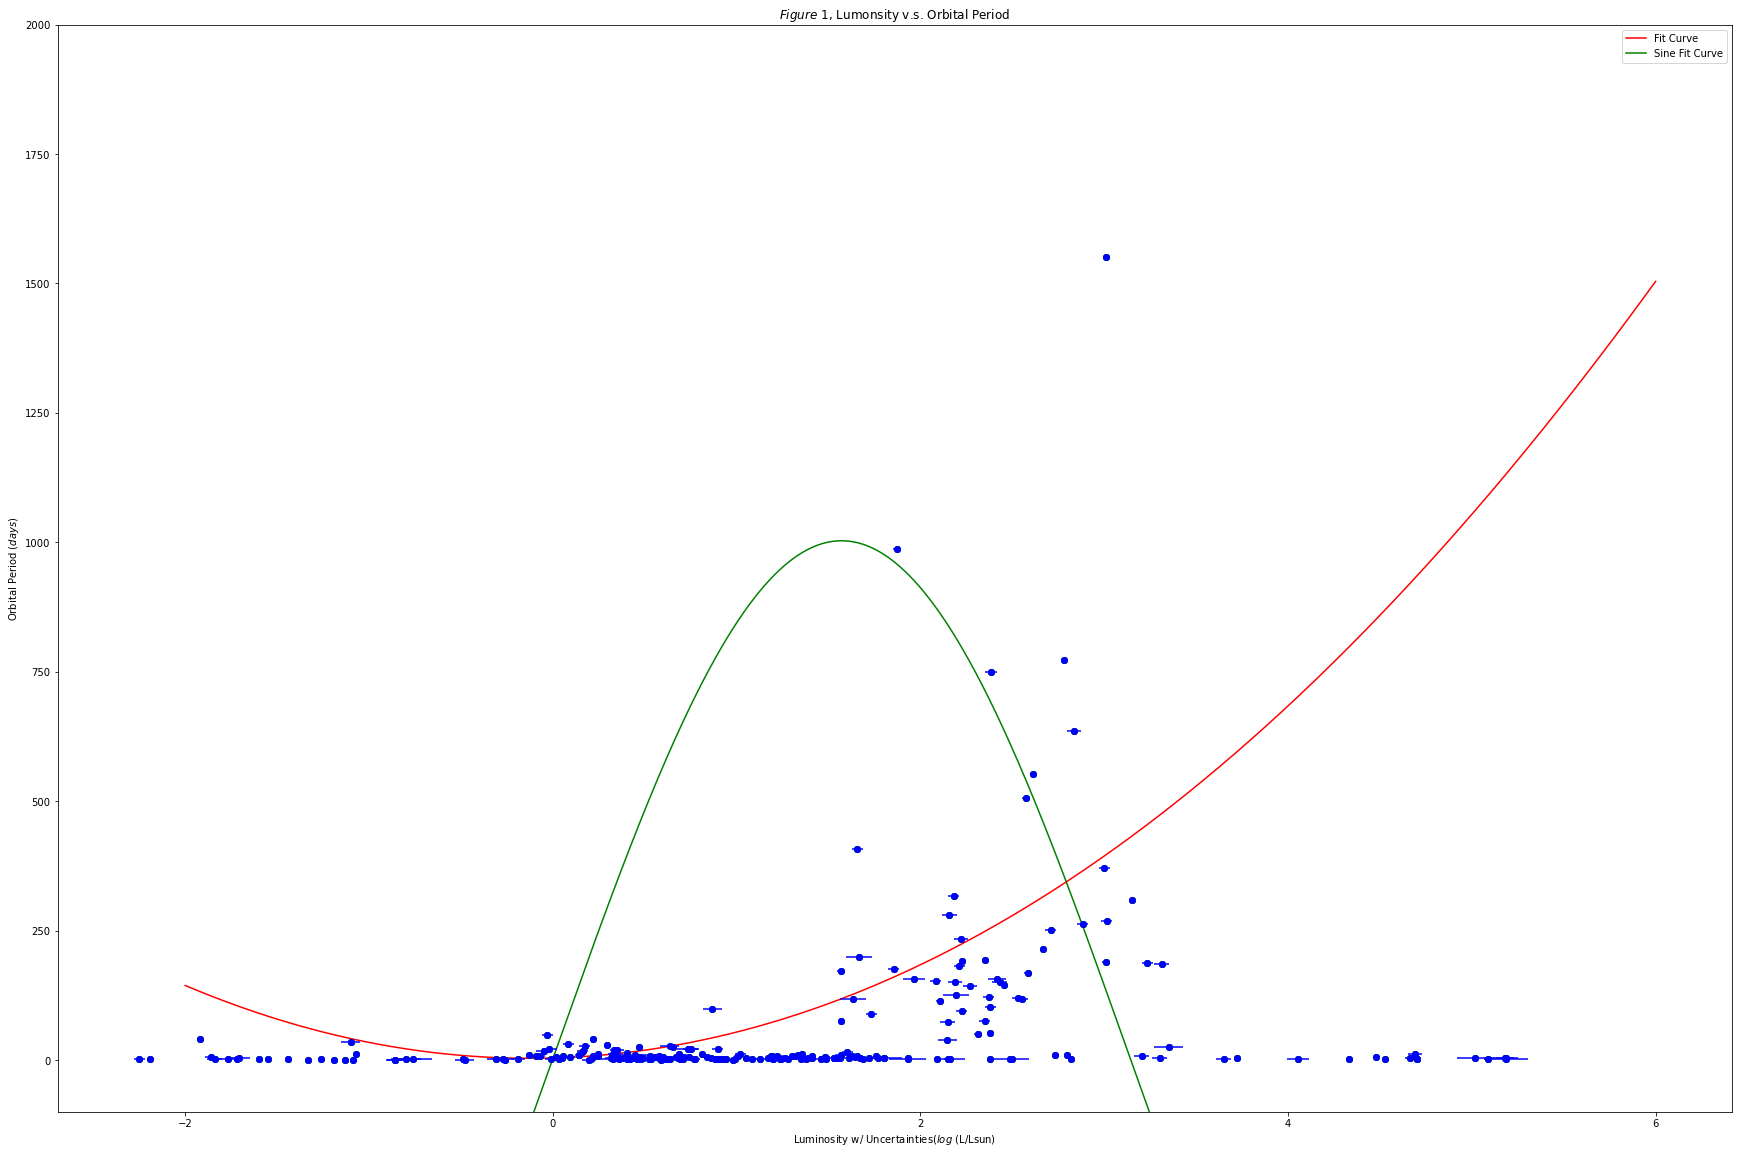

In [7]:
#Sort Values in terms of Luinosity
import scipy.optimize as fitter

lum_df = df.sort_values(by = 'Luminosity',kind='quicksort')
lum_df = df.reset_index(drop=True)

#Fitting, Quad
plt.figure()
def model2(x, a, b, c):
    return a + b*x + c*x*x

par0    = np.array([4.0, 10.0, 40])
par, cov = fitter.curve_fit(model2, lum_df.Luminosity, lum_df.Period__days_, par0, lum_df.Lum_Sigma)

corr = cov.copy()
for i in range(len(par)):
    for j in range(len(par)):
        corr[i,j] = cov[i,j]/np.sqrt(cov[i,i]*cov[j,j])
        

chi_squared = np.sum(((model2(lum_df.Luminosity, *par)-lum_df.Period__days_)/lum_df.Lum_Sigma)**2)
reduced_chi_squared = (chi_squared)/(len(lum_df.Luminosity)-len(par))
print('Quadratic Chi Squared and Reduced Chi Squared')
print ('chi^2 = {0:5.2f}'.format(chi_squared))
print ('chi^2/d.f.={0:5.2f}'.format(reduced_chi_squared))


xfit = np.linspace(-2,6,10000)
plt.errorbar(lum_df.Luminosity, lum_df.Period__days_, xerr=0, yerr=lum_df.Lum_Sigma, fmt='go')
plt.plot(xfit,model2(xfit,par[0],par[1], par[2]),'r-', label='Fit Curve')


#Fitting Sine
def model3(x, a, b, c ,d):
    return a * np.sin(b*x) + d

par0    = np.array([1000.0, 1, 100, 3])
par, cov = fitter.curve_fit(model3, lum_df.Luminosity, lum_df.Period__days_, par0, lum_df.Lum_Sigma)

corr = cov.copy()
for i in range(len(par)):
    for j in range(len(par)):
        corr[i,j] = cov[i,j]/np.sqrt(cov[i,i]*cov[j,j])
        

chi_squared = np.sum(((model3(lum_df.Luminosity, *par)-lum_df.Period__days_)/lum_df.Lum_Sigma)**2)
reduced_chi_squared = (chi_squared)/(len(lum_df.Luminosity)-len(par))
print('Sine Wave Chi Squared and Reduced Chi Squared')
print ('chi^2 = {0:5.2f}'.format(chi_squared))
print ('chi^2/d.f.={0:5.2f}'.format(reduced_chi_squared))

plt.plot(xfit,model3(xfit,par[0],par[1], par[2],par[3]),'g-', label='Sine Fit Curve')


#Plotting with errorbars
plt.errorbar(lum_df.Luminosity, lum_df.Period__days_, xerr=lum_df.Lum_Sigma, yerr=0, fmt='bo')
plt.scatter(lum_df.Luminosity, lum_df.Period__days_, c='green')
plt.rcParams["figure.figsize"] = [20,10]
plt.title('$Figure$ $1$, Lumonsity v.s. Orbital Period')
plt.ylabel('Orbital Period ($days$)')
plt.xlabel('Luminosity w/ Uncertainties($log$ (L/Lsun)')
plt.ylim(-100,2000)
plt.legend(loc='upper right')
plt.show()

Therefore, according to $Figure$ $1$, there is no correlation between Luminosity and Orbital Periods, as no matter how you try to fit, chi^2 and reduced chi^2 would always be infinity.

# Statistics of Luminosity and Orbital Period of the Dataset

In [8]:
print('The Following are the Standard Deviation,Mean, and Median of the Luminosity Values (log L/Sun): ')
print ('Standard deviation = {0:3.1f}'.format(np.std(lum_df.Luminosity)))
print ('Mean = {0:3.1f}'.format(np.mean(lum_df.Luminosity)))
print ('Median = {0:3.1f}'.format(np.median(lum_df.Luminosity)))
print('The Following are the Standard Deviation, Mean, and Median of the Orbial Period (Days) ')
print ('Standard deviation = {0:3.1f}'.format(np.std(lum_df.Period__days_)))
print ('Mean = {0:3.1f}'.format(np.mean(lum_df.Period__days_)))
print ('Median = {0:3.1f}'.format(np.median(lum_df.Period__days_)))

The Following are the Standard Deviation,Mean, and Median of the Luminosity Values (log L/Sun): 
Standard deviation = 1.4
Mean = 1.2
Median = 1.0
The Following are the Standard Deviation, Mean, and Median of the Orbial Period (Days) 
Standard deviation = 159.0
Mean = 58.2
Median = 5.0


# Using the Second Set of Data

As the dataframe consists of 2 different sets of data per star, we can use this alternate data to conclude if there is a correlation between Lumonisty and Orbital Period

In [9]:
#Grabs Sigma Values, as well as splitting 'Sec_log__L_Lsun_' from being a string to a float
lum = np.array(df['Sec_log__L_Lsun_'])
orbital = np.array(df['Period__days_'])

luminosity_sec = []
lum_sigma_sec = []

for i in range(len(lum)):
    luminosity_sec.append(float(lum[i][0:5]))
    lum_sigma_sec.append(float(lum[i][-5:-1]))


#Creates a new column for Sec Luminosity &  Sec Uncertainies
df['Sec_Luminosity'] = luminosity_sec
df['Lum_Sigma_Sec'] = lum_sigma_sec

df

,System,Period__days_,V,Mass__Msun_,log_Teff__K_,log__L_Lsun_,[M_H],B-V,Sec_Spectral_type,Sec_Mass__Msun__,Sec_Radius__Rsun_,Sec_Surface_gravity__cgs_,Sec_Log_Teff__K_,Sec_log__L_Lsun_,Luminosity,Lum_Sigma,Sec_Luminosity,Lum_Sigma_Sec
0,CM Dra,1.268,12.90,0.2310 ± 0.0009,3.496 ± 0.010,-2.258 ± 0.038,-0.30,1.60,M4.5_V,0.2141 ± 0.0009,0.2396 ± 0.0015,5.009 ± 0.006,3.494 ± 0.014,-2.313 ± 0.056,-2.250,0.03,-2.310,0.05
1,KOI-126 BC,1.722,-1.00,0.2352 ± 0.0006,3.510 ± 0.005,-2.194 ± 0.020,0.15,-1.00,M,0.2073 ± 0.0006,0.2315 ± 0.0007,5.026 ± 0.003,3.501 ± 0.005,-2.312 ± 0.020,-2.190,0.02,-2.310,0.02
2,LSPM J1112+7626,41.033,14.85,0.3946 ± 0.0023,3.486 ± 0.024,-1.92 ± 0.08,NaN,1.49,none,0.2745 ± 0.0012,0.2978 ± 0.0048,4.929 ± 0.014,3.470 ± 0.023,-2.21 ± 0.09,-1.920,0.00,-2.210,0.00
3,PTFEB 132.707+19.810,6.016,17.89,0.3953 ± 0.0020,3.513 ± 0.012,-1.863 ± 0.032,0.14,1.66,M4.3_V,0.2098 ± 0.0014,0.272 ± 0.012,4.891 ± 0.039,3.494 ± 0.015,-2.30 ± 0.13,-1.860,0.03,-2.300,0.10
4,EPIC 203710387,2.809,14.30,0.1158 ± 0.0031,3.483 ± 0.011,-1.842 ± 0.047,NaN,1.80,M5V,0.1056 ± 0.0027,0.4236 ± 0.0056,4.207 ± 0.010,3.483 ± 0.011,-1.861 ± 0.047,-1.840,0.04,-1.860,0.04
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
241,EM Car,3.414,8.38,22.89 ± 0.32,4.531 ± 0.026,5.02 ± 0.10,NaN,-0.31,O8_V,21.43 ± 0.33,8.34 ± 0.14,3.926 ± 0.016,4.531 ± 0.026,4.92 ± 0.10,5.020,0.10,4.920,0.10
242,V3903 Sgr,1.744,7.27,27.27 ± 0.55,4.580 ± 0.021,5.087 ± 0.029,NaN,0.06,O9_V,19.01 ± 0.44,6.125 ± 0.060,4.143 ± 0.013,4.531 ± 0.021,4.658 ± 0.032,5.087,0.02,4.658,0.03
243,CC Cas,3.366,7.08,23.49 ± 0.92,4.538 ± 0.025,5.179 ± 0.053,NaN,0.48,B0.5_V,9.95 ± 0.34,6.84 ± 0.18,3.766 ± 0.022,4.452 ± 0.031,4.474 ± 0.064,5.179,0.05,4.474,0.06
244,δ Cir,3.902,5.09,20.00 ± 0.50,4.574 ± 0.010,5.184 ± 0.070,NaN,-0.06,O9.5_V,11.41 ± 0.24,5.326 ± 0.091,4.043 ± 0.014,4.519 ± 0.013,4.339 ± 0.090,5.184,0.07,4.339,0.09


In [10]:
df = df.sort_values(by = 'Luminosity',kind='quicksort')
df = df.reset_index(drop=True)
df

,System,Period__days_,V,Mass__Msun_,log_Teff__K_,log__L_Lsun_,[M_H],B-V,Sec_Spectral_type,Sec_Mass__Msun__,Sec_Radius__Rsun_,Sec_Surface_gravity__cgs_,Sec_Log_Teff__K_,Sec_log__L_Lsun_,Luminosity,Lum_Sigma,Sec_Luminosity,Lum_Sigma_Sec
0,CM Dra,1.268,12.90,0.2310 ± 0.0009,3.496 ± 0.010,-2.258 ± 0.038,-0.30,1.60,M4.5_V,0.2141 ± 0.0009,0.2396 ± 0.0015,5.009 ± 0.006,3.494 ± 0.014,-2.313 ± 0.056,-2.250,0.03,-2.310,0.05
1,KOI-126 BC,1.722,-1.00,0.2352 ± 0.0006,3.510 ± 0.005,-2.194 ± 0.020,0.15,-1.00,M,0.2073 ± 0.0006,0.2315 ± 0.0007,5.026 ± 0.003,3.501 ± 0.005,-2.312 ± 0.020,-2.190,0.02,-2.310,0.02
2,LSPM J1112+7626,41.033,14.85,0.3946 ± 0.0023,3.486 ± 0.024,-1.92 ± 0.08,NaN,1.49,none,0.2745 ± 0.0012,0.2978 ± 0.0048,4.929 ± 0.014,3.470 ± 0.023,-2.21 ± 0.09,-1.920,0.00,-2.210,0.00
3,PTFEB 132.707+19.810,6.016,17.89,0.3953 ± 0.0020,3.513 ± 0.012,-1.863 ± 0.032,0.14,1.66,M4.3_V,0.2098 ± 0.0014,0.272 ± 0.012,4.891 ± 0.039,3.494 ± 0.015,-2.30 ± 0.13,-1.860,0.03,-2.300,0.10
4,EPIC 203710387,2.809,14.30,0.1158 ± 0.0031,3.483 ± 0.011,-1.842 ± 0.047,NaN,1.80,M5V,0.1056 ± 0.0027,0.4236 ± 0.0056,4.207 ± 0.010,3.483 ± 0.011,-1.861 ± 0.047,-1.840,0.04,-1.860,0.04
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
241,EM Car,3.414,8.38,22.89 ± 0.32,4.531 ± 0.026,5.02 ± 0.10,NaN,-0.31,O8_V,21.43 ± 0.33,8.34 ± 0.14,3.926 ± 0.016,4.531 ± 0.026,4.92 ± 0.10,5.020,0.10,4.920,0.10
242,V3903 Sgr,1.744,7.27,27.27 ± 0.55,4.580 ± 0.021,5.087 ± 0.029,NaN,0.06,O9_V,19.01 ± 0.44,6.125 ± 0.060,4.143 ± 0.013,4.531 ± 0.021,4.658 ± 0.032,5.087,0.02,4.658,0.03
243,CC Cas,3.366,7.08,23.49 ± 0.92,4.538 ± 0.025,5.179 ± 0.053,NaN,0.48,B0.5_V,9.95 ± 0.34,6.84 ± 0.18,3.766 ± 0.022,4.452 ± 0.031,4.474 ± 0.064,5.179,0.05,4.474,0.06
244,δ Cir,3.902,5.09,20.00 ± 0.50,4.574 ± 0.010,5.184 ± 0.070,NaN,-0.06,O9.5_V,11.41 ± 0.24,5.326 ± 0.091,4.043 ± 0.014,4.519 ± 0.013,4.339 ± 0.090,5.184,0.07,4.339,0.09


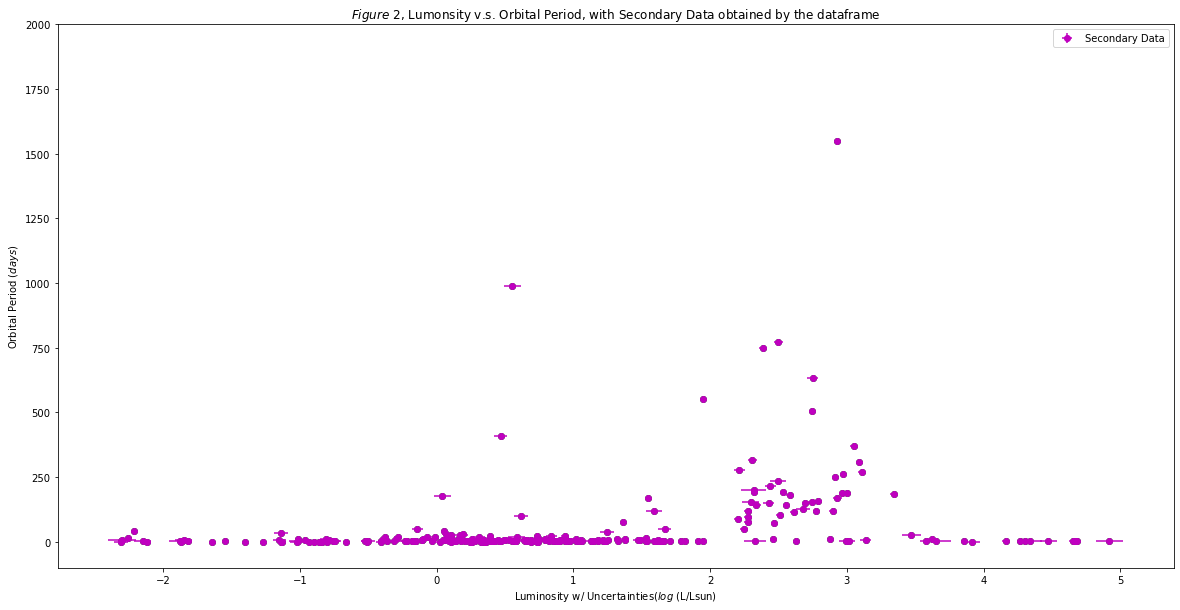

In [11]:
#Plotting with errorbars
plt.errorbar(df.Sec_Luminosity, df.Period__days_, xerr=df.Lum_Sigma_Sec, yerr=0, fmt='mo', label='Secondary Data')
plt.scatter(df.Sec_Luminosity, df.Period__days_, c='green')
plt.rcParams["figure.figsize"] = [20,10]
plt.title('$Figure$ $2$, Lumonsity v.s. Orbital Period, with Secondary Data obtained by the dataframe')
plt.ylabel('Orbital Period ($days$)')
plt.xlabel('Luminosity w/ Uncertainties($log$ (L/Lsun)')
plt.ylim(-100,2000)
plt.legend(loc='upper right')
plt.show()

Quadratic Chi Squared and Reduced Chi Squared
chi^2 =   inf
chi^2/d.f.=  inf
Quadratic Chi Squared and Reduced Chi Squared
chi^2 =   inf
chi^2/d.f.=  inf


/Users/aaronsu/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/minpack.py:756: RuntimeWarning: divide by zero encountered in true_divide
  transform = 1.0 / sigma
/Users/aaronsu/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/var/folders/yw/mbkk14vn3nnczstvd2hkrm4r0000gn/T/ipykernel_16716/1664935629.py:12: RuntimeWarning: invalid value encountered in double_scalars
  corr[i,j] = cov[i,j]/np.sqrt(cov[i,i]*cov[j,j])
/Users/aaronsu/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/minpack.py:756: RuntimeWarning: divide by zero encountered in true_divide
  transform = 1.0 / sigma
/Users/aaronsu/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/var/fo

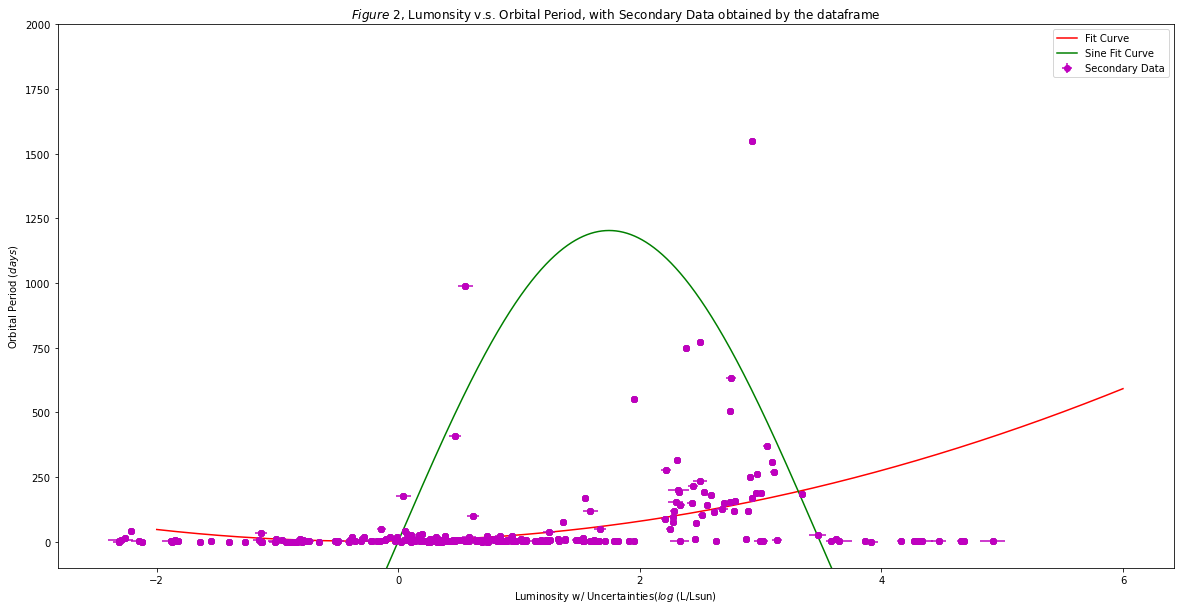

In [12]:
#Fitting, Quad
plt.figure()
def model2(x, a, b, c):
    return a + b*x + c*x*x

par0    = np.array([4.0, 8.0, 15])
par, cov = fitter.curve_fit(model2, df.Sec_Luminosity, df.Period__days_, par0, df.Lum_Sigma_Sec)

corr = cov.copy()
for i in range(len(par)):
    for j in range(len(par)):
        corr[i,j] = cov[i,j]/np.sqrt(cov[i,i]*cov[j,j])
        

chi_squared = np.sum(((model2(df.Sec_Luminosity, *par)-df.Period__days_)/df.Lum_Sigma_Sec)**2)
reduced_chi_squared = (chi_squared)/(len(lum_df.Luminosity)-len(par))
print('Quadratic Chi Squared and Reduced Chi Squared')
print ('chi^2 = {0:5.2f}'.format(chi_squared))
print ('chi^2/d.f.={0:5.2f}'.format(reduced_chi_squared))

plt.errorbar(df.Sec_Luminosity, df.Period__days_, xerr=0, yerr=df.Lum_Sigma_Sec, fmt='mo')
plt.plot(xfit,model2(xfit,par[0],par[1], par[2]),'r-', label='Fit Curve')
xfit = np.linspace(-2,6,10000)

#Fitting Sine
def model3(x, a, b, c ,d):
    return a * np.sin(b*x) + d

par0    = np.array([1200.0, .9, 100, 3])
par, cov = fitter.curve_fit(model3, lum_df.Luminosity, lum_df.Period__days_, par0, lum_df.Lum_Sigma)

corr = cov.copy()
for i in range(len(par)):
    for j in range(len(par)):
        corr[i,j] = cov[i,j]/np.sqrt(cov[i,i]*cov[j,j])
        

chi_squared = np.sum(((model3(df.Sec_Luminosity, *par)-df.Period__days_)/df.Lum_Sigma_Sec)**2)
reduced_chi_squared = (chi_squared)/(len(lum_df.Luminosity)-len(par))
print('Quadratic Chi Squared and Reduced Chi Squared')
print ('chi^2 = {0:5.2f}'.format(chi_squared))
print ('chi^2/d.f.={0:5.2f}'.format(reduced_chi_squared))

plt.errorbar(df.Sec_Luminosity, df.Period__days_, xerr=0, yerr=df.Lum_Sigma_Sec, fmt='mo')


plt.plot(xfit,model3(xfit,par[0],par[1], par[2],par[3]),'g-', label='Sine Fit Curve')

#Legend, Labels, etc...
plt.errorbar(df.Sec_Luminosity, df.Period__days_, xerr=df.Lum_Sigma_Sec, yerr=0, fmt='mo', label='Secondary Data')
plt.scatter(df.Sec_Luminosity, df.Period__days_, c='green')
plt.rcParams["figure.figsize"] = [20,10]
plt.title('$Figure$ $2$, Lumonsity v.s. Orbital Period, with Secondary Data obtained by the dataframe')
plt.ylabel('Orbital Period ($days$)')
plt.xlabel('Luminosity w/ Uncertainties($log$ (L/Lsun)')
plt.ylim(-100,2000)
plt.legend(loc='upper right')
plt.show()

Therefore, according to $Figure$ $2$, We can determine that even with updated data, there is no direct correlation between Orbital Period and Luminosity

# Let's Look Beyond 2D Plots

As we can tell from $Figure$ 1 and $Figure$ 2, we can see that there is ***no direct correlation*** between Luminosity and Orbital Period, however can we determine if there is another factor, such as Mass, impacting the results? As my fellow groupmate Chengzhe pointed out, there is a a sizable correlation between Lumonisty and Orbital Period.

First we will have to split the Mass data from its uncertaines as we did with the data previousily in the notebook.

In [13]:
mass = np.array(df['Mass__Msun_'])
mass_list = []
mass_sigma = []

for i in range(len(lum)):
    mass_list.append(float(lum[i][0:5]))
    mass_sigma.append(float(lum[i][-5:-1]))


#Creates a new column for Sec Luminosity &  Sec Uncertainies
df['Mass'] =  mass_list
df['Mass_Sigma'] = mass_sigma
df


,System,Period__days_,V,Mass__Msun_,log_Teff__K_,log__L_Lsun_,[M_H],B-V,Sec_Spectral_type,Sec_Mass__Msun__,Sec_Radius__Rsun_,Sec_Surface_gravity__cgs_,Sec_Log_Teff__K_,Sec_log__L_Lsun_,Luminosity,Lum_Sigma,Sec_Luminosity,Lum_Sigma_Sec,Mass,Mass_Sigma
0,CM Dra,1.268,12.90,0.2310 ± 0.0009,3.496 ± 0.010,-2.258 ± 0.038,-0.30,1.60,M4.5_V,0.2141 ± 0.0009,0.2396 ± 0.0015,5.009 ± 0.006,3.494 ± 0.014,-2.313 ± 0.056,-2.250,0.03,-2.310,0.05,-2.310,0.05
1,KOI-126 BC,1.722,-1.00,0.2352 ± 0.0006,3.510 ± 0.005,-2.194 ± 0.020,0.15,-1.00,M,0.2073 ± 0.0006,0.2315 ± 0.0007,5.026 ± 0.003,3.501 ± 0.005,-2.312 ± 0.020,-2.190,0.02,-2.310,0.02,-2.310,0.02
2,LSPM J1112+7626,41.033,14.85,0.3946 ± 0.0023,3.486 ± 0.024,-1.92 ± 0.08,NaN,1.49,none,0.2745 ± 0.0012,0.2978 ± 0.0048,4.929 ± 0.014,3.470 ± 0.023,-2.21 ± 0.09,-1.920,0.00,-2.210,0.00,-2.210,0.00
3,PTFEB 132.707+19.810,6.016,17.89,0.3953 ± 0.0020,3.513 ± 0.012,-1.863 ± 0.032,0.14,1.66,M4.3_V,0.2098 ± 0.0014,0.272 ± 0.012,4.891 ± 0.039,3.494 ± 0.015,-2.30 ± 0.13,-1.860,0.03,-2.300,0.10,-2.300,0.10
4,EPIC 203710387,2.809,14.30,0.1158 ± 0.0031,3.483 ± 0.011,-1.842 ± 0.047,NaN,1.80,M5V,0.1056 ± 0.0027,0.4236 ± 0.0056,4.207 ± 0.010,3.483 ± 0.011,-1.861 ± 0.047,-1.840,0.04,-1.860,0.04,-1.860,0.04
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
241,EM Car,3.414,8.38,22.89 ± 0.32,4.531 ± 0.026,5.02 ± 0.10,NaN,-0.31,O8_V,21.43 ± 0.33,8.34 ± 0.14,3.926 ± 0.016,4.531 ± 0.026,4.92 ± 0.10,5.020,0.10,4.920,0.10,4.920,0.10
242,V3903 Sgr,1.744,7.27,27.27 ± 0.55,4.580 ± 0.021,5.087 ± 0.029,NaN,0.06,O9_V,19.01 ± 0.44,6.125 ± 0.060,4.143 ± 0.013,4.531 ± 0.021,4.658 ± 0.032,5.087,0.02,4.658,0.03,4.658,0.03
243,CC Cas,3.366,7.08,23.49 ± 0.92,4.538 ± 0.025,5.179 ± 0.053,NaN,0.48,B0.5_V,9.95 ± 0.34,6.84 ± 0.18,3.766 ± 0.022,4.452 ± 0.031,4.474 ± 0.064,5.179,0.05,4.474,0.06,4.474,0.06
244,δ Cir,3.902,5.09,20.00 ± 0.50,4.574 ± 0.010,5.184 ± 0.070,NaN,-0.06,O9.5_V,11.41 ± 0.24,5.326 ± 0.091,4.043 ± 0.014,4.519 ± 0.013,4.339 ± 0.090,5.184,0.07,4.339,0.09,4.339,0.09


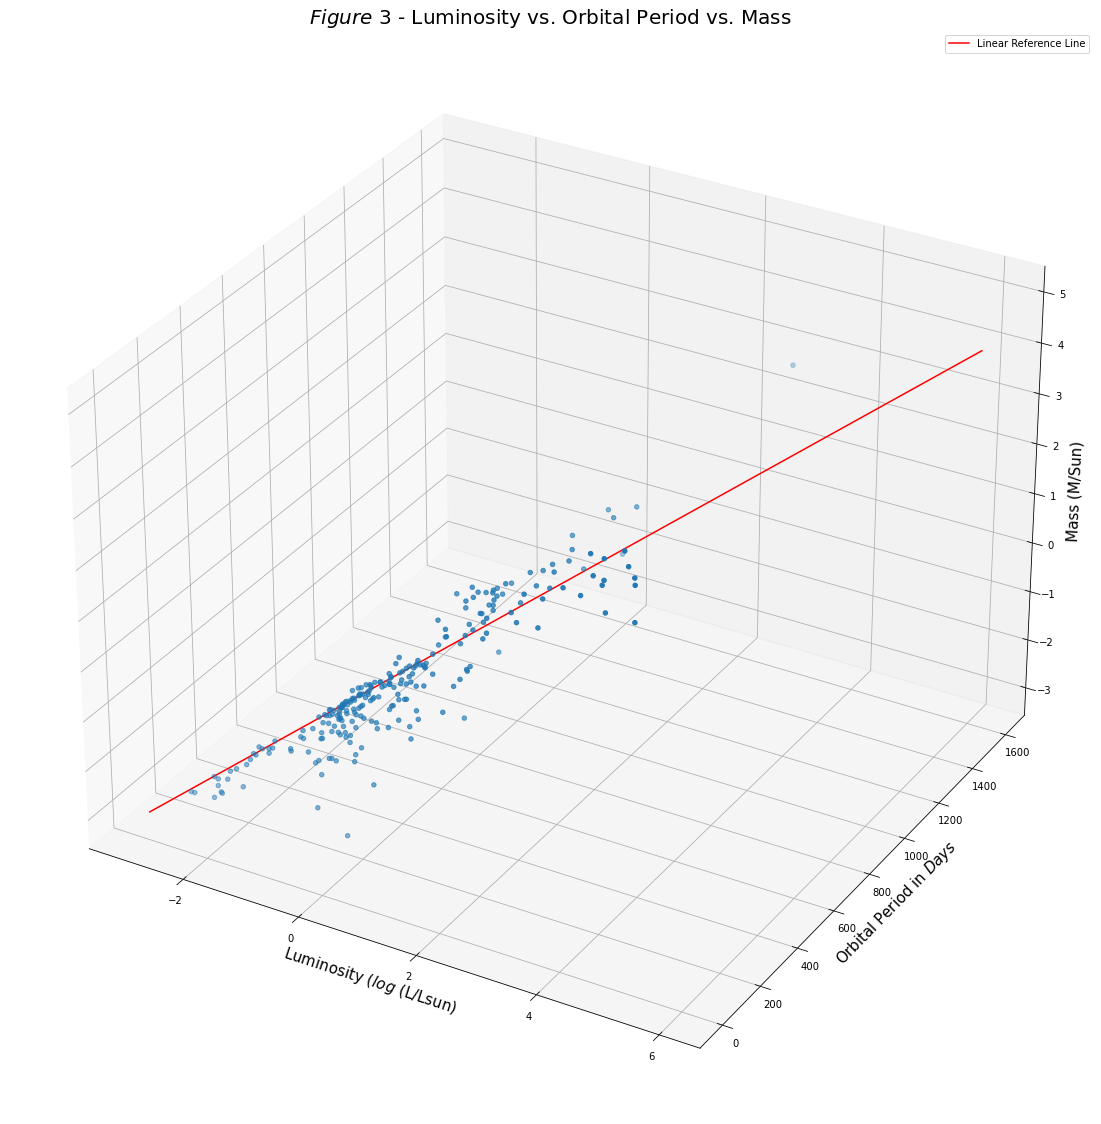

In [14]:
import sys
from mpl_toolkits import mplot3d
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

#Reference Line
x = np.linspace(-3, 6, 1000)
y = np.linspace(0, 1600, 1000)
z = np.linspace(-3, 4, 1000)


fig = plt.figure(figsize=(20,20))
ax = plt.axes(projection='3d')

ax.scatter3D(df.Luminosity, df.Period__days_, df.Mass, 'gray')
ax.plot(x,y,z,'red',label='Linear Reference Line')
ax.set_ylabel('Orbital Period in $Days$', fontsize=15);
ax.set_xlabel('Luminosity ($log$ (L/Lsun)', fontsize=15);
ax.set_zlabel('Mass (M/Sun)',  rotation=90,fontsize=15);
ax.set_title('$Figure$ $3$ - Luminosity vs. Orbital Period vs. Mass', fontsize=20)
ax.legend(loc = 'upper right');

By looking at $Figure$ $3$, we can see that there is a intresting correlation between the Linear Reference Line and the Scatter Points. However, as this is a Introduction Python Class, I have yet devleoped the skill sets to expand on this further.